# Mass Interpolation

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [4]:
import os
import pickle
from collections import OrderedDict

import h5py
import numpy as np
import pandas as pd
from astropy.table import Table
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
sns.set_context('notebook')

from agnfinder import visualise_templates
from agnfinder.forward_model import interpolate_templates
from agnfinder.models import InterpolatedModel

In [29]:
save_loc = '/home/mike/repos/agnfinder/data/fsps_cache.hdf5'
with h5py.File(save_loc, 'r') as f:
    X = f['fsps_cache']['X'][...]
    mass = f['fsps_cache']['mass'][...]

In [30]:
X.shape, mass.shape

((15000, 3), (15000,))

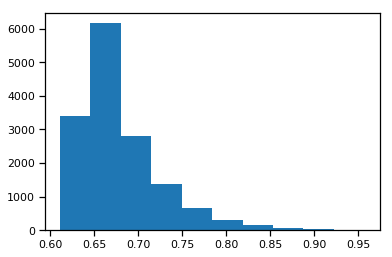

In [61]:
_ = plt.hist(mass)

In [62]:
from sklearn.linear_model import BayesianRidge
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_predict, GridSearchCV
from sklearn.metrics import mean_squared_error

In [63]:
# clf = BayesianRidge()
clf = GradientBoostingRegressor()
predictions = cross_val_predict(clf, X, mass, cv=5)

In [ ]:
# clf = GridSearchCV(svc, parameters, cv=5)

In [64]:
predictions

array([0.66140454, 0.64861454, 0.68134112, ..., 0.72858379, 0.65865179,
       0.6353561 ])

In [65]:
mean_squared_error(mass, predictions)

3.4354875360935747e-07

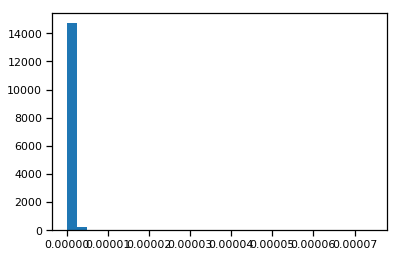

In [66]:
_ = plt.hist((predictions - mass)**2, bins=30)

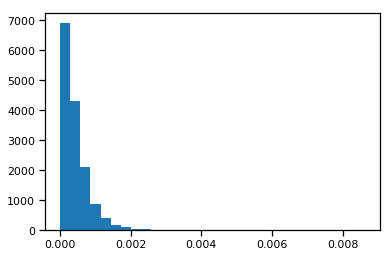

In [67]:
_ = plt.hist(np.abs(predictions - mass), bins=30)

In [68]:
clf.fit(X, mass)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [69]:
import pickle
model_loc = '/home/mike/repos/agnfinder/notebooks/mass_emulator.pickle'
with open(model_loc, 'wb') as f:
    pickle.dump(clf, f)

In [70]:
with open(model_loc, 'rb') as f:
    clf = pickle.load(f)
clf.predict(X[14:15, :]), mass[14:15] # techinically train set, oh well

(array([0.70762391]), array([0.70711703]))